In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [2]:
# Planck's law per unit wavelength, λ
def u_λ(λ, T): 
    return 8.0 * np.pi * hc / ((λ ** 5) * (np.exp(hc/(k_B * λ * T)) - 1)) # [eV * μm^(-4)]

hc = 1.23984 # [eV * μm]
k_B = 8.617333 * (10 ** (-5)) # [eV / K]

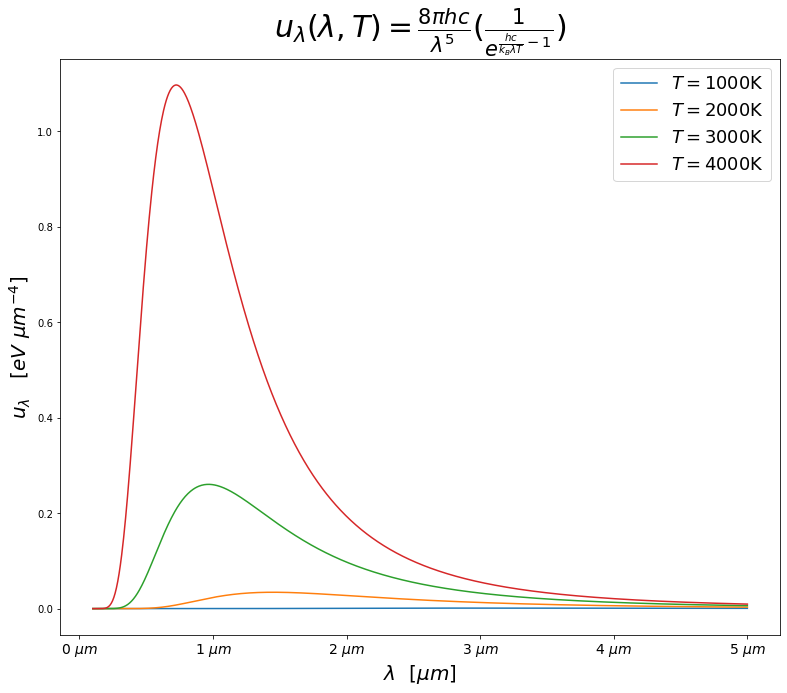

In [3]:
# [2]

fig = plt.figure(figsize = (10, 8))

ax1 = fig.add_axes([0, 0, 1, 1])

ax1.set_title(r"$u_λ(λ, T)=\frac{8 \pi h c}{\lambda^5}(\frac{1}{e^{\frac{h c}{k_B \lambda T}-1}})$", fontsize = 30)
ax1.set_xticks([i for i in range(6)])
ax1.set_xticklabels([f"{i}$ ~\mu m $" for i in range(6)], fontsize = 14)
ax1.set_xlabel(r"$λ~~$[$\mu m$]", fontsize = 20)
ax1.set_ylabel(r"$u_λ~~$ [$eV~μm^{-4} $]", fontsize = 20)

λ1_values = np.linspace(0.1, 5, 1000)

for t in range (4):
    ax1.plot(λ1_values, u_λ(λ1_values, (t+1) * 1000), label = "$T=$"+str((t+1)*1000)+"K")

ax1.legend(fontsize = 18)

<ipython-input-2-768c2f68baa7>:3: RuntimeWarning: overflow encountered in exp
  return 8.0 * np.pi * hc / ((λ ** 5) * (np.exp(hc/(k_B * λ * T)) - 1)) # [eV * μm^(-4)]
<ipython-input-2-768c2f68baa7>:3: RuntimeWarning: overflow encountered in exp
  return 8.0 * np.pi * hc / ((λ ** 5) * (np.exp(hc/(k_B * λ * T)) - 1)) # [eV * μm^(-4)]


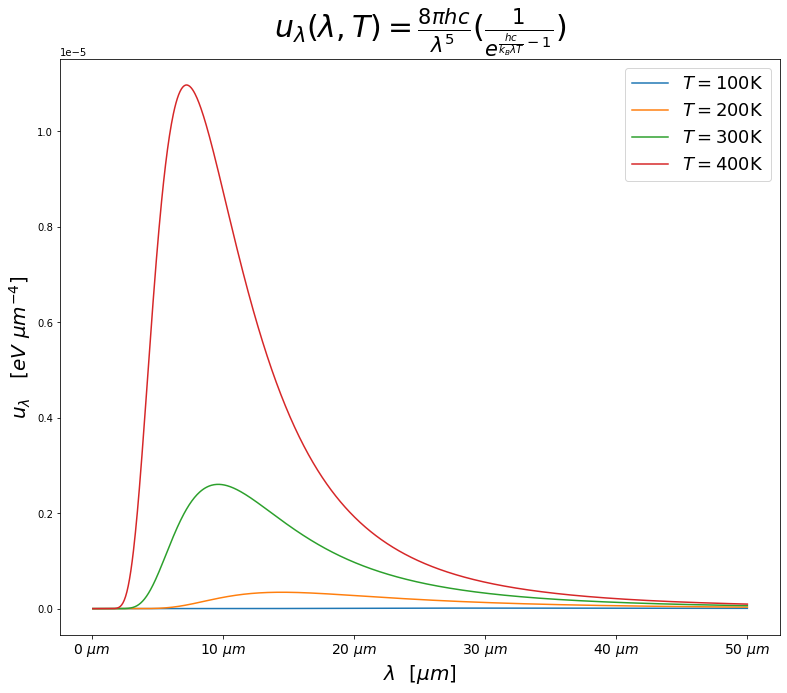

In [4]:
# [3]

fig = plt.figure(figsize = (10, 8))

ax2 = fig.add_axes([0, 0, 1, 1])

ax2.set_title(r"$u_λ(λ, T)=\frac{8 \pi h c}{\lambda^5}(\frac{1}{e^{\frac{h c}{k_B \lambda T}-1}})$", fontsize = 30)
ax2.set_xticks([i*10 for i in range(6)])
ax2.set_xticklabels([f"{i*10}$ ~\mu m $" for i in range(6)], fontsize = 14)
ax2.set_xlabel(r"$λ~~$[$\mu m$]", fontsize = 20)
ax2.set_ylabel(r"$u_λ~~$ [$eV~μm^{-4} $]", fontsize = 20)

λ2_values = np.linspace(0.1, 50, 1000)

for t in range (4):
    ax2.plot(λ2_values, u_λ(λ2_values, (t+1) * 100), label = "$T=$"+str((t+1)*100)+"K")

ax2.legend(fontsize = 18)

In [5]:
# [4]-1
for t in range (4):
    arg_max = np.argmax(u_λ(λ1_values, (t+1) * 1000))
#print(arg_max) gives the index of the array
    λ1_max = λ1_values[arg_max]
    #print("λ_max = "+str(λ1_max)+" (T = "+str((t+1) * 1000)+")")
    #print(arg_max)
    
    W = λ1_max * (10 ** (-6)) * ((t+1) * 1000)
    print("λ_max * T = "+str(W)+"[K m]"+" (T = "+str((t+1) * 1000)+")")
    
for t in range (4):
    arg_max = np.argmax(u_λ(λ2_values, (t+1) * 100))
    λ2_max = λ2_values[arg_max]
    #print("λ_max = "+str(λ2_max)+" (T = "+str((t+1) * 100)+")")
    #print(arg_max)
    
    W = λ2_max * (10 ** (-6)) * ((t+1) * 100)
    print("λ_max * T = "+str(W)+"[K m]"+" (T = "+str((t+1) * 100)+")")
    
print("According to Wien's law,")
print("λ_max * T = 2.898 * 10^(-3) [K m]") 

λ_max * T = 0.002895795795795796[K m] (T = 1000)
λ_max * T = 0.0028976976976976985[K m] (T = 2000)
λ_max * T = 0.002904504504504504[K m] (T = 3000)
λ_max * T = 0.0028916916916916914[K m] (T = 4000)
λ_max * T = 0.0028971071071071065[K m] (T = 100)
λ_max * T = 0.0028971171171171166[K m] (T = 200)
λ_max * T = 0.0028921321321321316[K m] (T = 300)
λ_max * T = 0.0028971371371371364[K m] (T = 400)
According to Wien's law,
λ_max * T = 2.898 * 10^(-3) [K m]


<ipython-input-2-768c2f68baa7>:3: RuntimeWarning: overflow encountered in exp
  return 8.0 * np.pi * hc / ((λ ** 5) * (np.exp(hc/(k_B * λ * T)) - 1)) # [eV * μm^(-4)]


In [6]:
#[5]
c = 299792458 * (10 ** (6)) #μm/s

def e_λ(λ, T):
    return u_λ(λ, T) * c / 4


for t in range (4):
    var, err = integrate.quad(e_λ, 0, np.inf, args = (t+1)*1000)
    #print("e_tot = "+str(var)+" (T = "+str((t+1) * 1000)+")")
    #print("err = "+str(err))
    
    k = var / (((t+1)*1000) ** 4)
    print("e_tot/T = "+str(k)+" (T = "+str((t+1) * 1000)+")")
    
for t in range (4):
    var, err = integrate.quad(e_λ, 0, np.inf, args = (t+1)*100) #args is T
    #print("e_tot = "+str(var)+" (T = "+str((t+1) * 100)+")")
    #print("err = "+str(err))
    
    k = var / (((t+1)*100) ** 4)
    print("e_tot/T = "+str(k)+" (T = "+str((t+1) * 100)+")")

print("According to Stefan's law,")
print("e_tot/T = σ = Stefan-Boltzmann constant = 0.354[eV/s/μm^2/K^4]")

e_tot/T = 0.3539185901710567 (T = 1000)
e_tot/T = 0.35391859017105676 (T = 2000)
e_tot/T = 0.35391859017105665 (T = 3000)
e_tot/T = 0.3539185901710567 (T = 4000)
e_tot/T = 0.3539185901710567 (T = 100)
e_tot/T = 0.3539185901710567 (T = 200)
e_tot/T = 0.35391859017105676 (T = 300)
e_tot/T = 0.3539185901710567 (T = 400)
According to Stefan's law,
e_tot/T = σ = Stefan-Boltzmann constant = 0.354[eV/s/μm^2/K^4]


<ipython-input-2-768c2f68baa7>:3: RuntimeWarning: overflow encountered in exp
  return 8.0 * np.pi * hc / ((λ ** 5) * (np.exp(hc/(k_B * λ * T)) - 1)) # [eV * μm^(-4)]


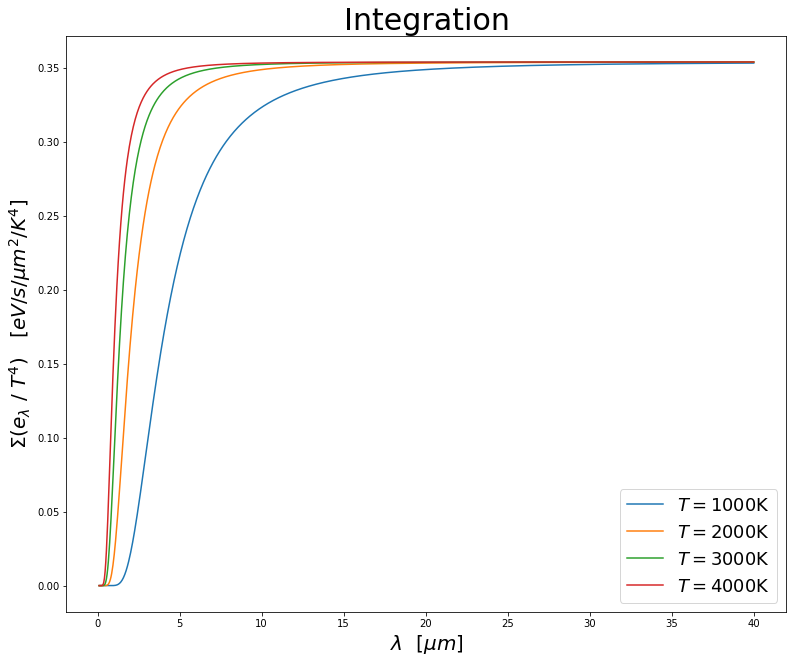

In [7]:
#[extra]

#e_f * 4 / c = u_λ(λ, T)

fig = plt.figure(figsize = (10, 8))
ax3 = fig.add_axes([0, 0, 1, 1])

ax3.set_title("Integration", fontsize = 30)
ax3.set_xlabel(r"$λ~~$[$\mu m$]", fontsize = 20)
ax3.set_ylabel(r"$Σ(e_λ~/~T^4)~~$ [$eV/s/μm^2/K^4$]", fontsize = 20)


λ1_values = np.linspace(0.1, 40, 1000)
e_λarray = np.zeros_like(λ1_values)

for t in range (4):
    
    for ix in range(0, len(λ1_values)):
        y = e_λ(λ1_values, (t+1) * 1000) / (((t+1)*1000) ** 4)
        y_sum = integrate.trapz(y[0 : ix], λ1_values[0 : ix])
    
        e_λarray[ix] = y_sum
    
    ax3.plot(λ1_values, e_λarray, label = "$T=$"+str((t+1)*1000)+"K")
    
ax3.legend(fontsize = 18)